# Business Analysis

#### Python function to retrieve data from Financial Modelling Prep - API

In [7]:
api_key = 'kR3pOO0UkPTyu5b4gq6pYCmk4tk8mga6' # Santhosh
api_key = 'eUMyuzTsDHEK7kI8KYxpBbaVS9yxrF4P' # Santhosh
ticker = 'AAPL'
outstanding_shares = 15552752000 #taken fron annual report


def get_data(url):
    import requests
    response = requests.get(url)
    data = response.json()
    return data


company_info = get_data(url = f"https://financialmodelingprep.com/api/v3/profile/{ticker}?apikey={api_key}")

In [9]:
import requests
import pandas as pd

In [21]:
cash_flow_url = f'https://financialmodelingprep.com/api/v3/cash-flow-statement/{ticker}?apikey={api_key}'
cash_flow_request = requests.get(cash_flow_url)
cash_flow_data = cash_flow_request.json()
cf = pd.DataFrame(cash_flow_data)
cf.set_index('date', inplace=True)
# cf

In [28]:
# cf = cf.T

# cf[['netCashProvidedByOperatingActivities','netCashUsedForInvestingActivites','netCashUsedProvidedByFinancingActivities','freeCashFlow']].T

cf['freeCashFlow']

date
2023-09-30     99584000000
2022-09-24    111443000000
2021-09-25     92953000000
2020-09-26     73365000000
2019-09-28     58896000000
Name: freeCashFlow, dtype: int64

In [35]:
df = cf.copy()



df[['netCashProvidedByOperatingActivities']]

,netCashProvidedByOperatingActivities
date,
2023-09-30,110543000000
2022-09-24,122151000000
2021-09-25,104038000000
2020-09-26,80674000000
2019-09-28,69391000000


In [32]:
df

AttributeError: 'Series' object has no attribute 'date'

In [30]:
# Create Plotly chart
import plotly.graph_objs as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['date'], y=df['freeCashFlow'], mode='lines+markers', name='Free Cash Flow'))

# Update layout
fig.update_layout(title='Free Cash Flow Over Time',
                  xaxis_title='Date',
                  yaxis_title='Free Cash Flow (USD)')

# Streamlit App
print(plotly_chart(fig))

KeyError: 'date'

In [5]:
str(company_info[0]['description'])

'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Fitness+, a personalized fitness service; Apple Music, which offers users a curated listening experience with on-demand radio stations; Apple News+, a subscription news and magazine service; Apple TV+, which offers exclusive original content; Apple Card, a co-branded credit card; and Apple P

A brief introduction to the company including
- • History
- • Current operations (Products and services offered)
- • Macroeconomic environment (Growth- organic or mergers or acquisitions)
- • Industrial competitors
- • Approximate market share of the company and competitors 

# Ratio and Valuation Analysis

In [106]:
income_statement = get_data(url=f'https://financialmodelingprep.com/api/v3/income-statement/{ticker}?period=annual&apikey={api_key}')
balance_sheet = get_data(url = f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{ticker}?period=annual&apikey={api_key}")
cashflow_statement = get_data( url = f"https://financialmodelingprep.com/api/v3/cash-flow-statement-as-reported/{ticker}?period=annual&limit=50&apikey={api_key}")

## LIQUIDITY RATIOS

### Current Ratio
### Quick Ratio
### Cash Ratio

### Current Ratio

In [107]:
#current ratio

round(balance_sheet[0]['totalCurrentAssets']/balance_sheet[0]['totalCurrentLiabilities'],2)

0.99

In [139]:
print(f"Total Current Assets: {balance_sheet[0]['totalCurrentAssets']} \nTotal Current Liabilities: {balance_sheet[0]['totalCurrentLiabilities']} \nCurrent Ratio: {round(balance_sheet[0]['totalCurrentAssets']/balance_sheet[0]['totalCurrentLiabilities'],2)}")

Total Current Assets: 143566000000 
Total Current Liabilities: 145308000000 
Current Ratio: 0.99


In [108]:
for i in range(5):
    print(balance_sheet[i]['totalCurrentAssets'],balance_sheet[i]['totalCurrentLiabilities'], balance_sheet[i]['totalCurrentAssets']/balance_sheet[i]['totalCurrentLiabilities'])

143566000000 145308000000 0.9880116717592975
135405000000 153982000000 0.8793560286267226
134836000000 125481000000 1.0745531195957954
143713000000 105392000000 1.3636044481554577
162819000000 105718000000 1.540125617208044


### Quick Ratio

In [109]:
#quick ratio

round((balance_sheet[0]['totalCurrentAssets'] - balance_sheet[0]['inventory']) / balance_sheet[0]['totalCurrentLiabilities'],2)

0.94

### Cash Ratio

In [110]:
#cash ratio

round(balance_sheet[0]['cashAndCashEquivalents']/balance_sheet[0]['totalCurrentLiabilities'],2)



0.21

# Profitability Ratios

### Gross profit margin (GPM)


In [111]:
#Gross profit margin (GPM)

round((income_statement[0]['grossProfit'] / income_statement[0]['revenue'] )* 100,2)

44.13

### Operating profit margin (GPM)

In [112]:
#Operating profit margin (OPM)

round((income_statement[0]['operatingIncome'] / income_statement[0]['revenue'] )* 100,2)

29.82

### Return of Asset(ROA)

In [113]:
# Return on assets (ROA)

round((income_statement[0]['netIncome'] / balance_sheet[0]['totalAssets'] )* 100,2)

27.51

### Return on equity (ROE)

In [114]:
# Return on equity (ROE)
round((income_statement[0]['netIncome'] - cashflow_statement[0]['paymentsofdividends']) / balance_sheet[0]['totalStockholdersEquity'] * 100,2)

131.9

### Return on sales (ROS)

In [115]:
#Return on sales (ROS)

round((income_statement[0]['operatingIncome'] - income_statement[0]['operatingExpenses']) / income_statement[0]['revenue'] * 100,2)

15.51

### Return on investment (ROI)

In [116]:
#Return on investment (ROI)

round((income_statement[0]['netIncome'] / income_statement[0]['costOfRevenue']) * 100,2)

45.3

### Price-to-Earnings ratio

In [117]:
#price-to-earnings ratio

round((company_info[0]['price'] / income_statement[0]['eps']),2)


27.97

### Dividend Payout ratio

In [118]:
#dividend payout ratio
# round(income_statement[0]['netIncome'] / outstanding_shares,2)

round(cashflow_statement[0]['paymentsofdividends'] / income_statement[0]['netIncome'],2)

0.15

### Debt-to-Equity ratio

In [119]:
#debt-to-equity ratio

round(balance_sheet[0]['netDebt'] / balance_sheet[0]['totalStockholdersEquity'],2)

1.31

In [120]:
roe = round((income_statement[0]['netIncome'] - cashflow_statement[0]['paymentsofdividends']) / balance_sheet[0]['totalStockholdersEquity'] * 100,2)
dividendPayoutRatio = round(cashflow_statement[0]['paymentsofdividends'] / income_statement[0]['netIncome'],2)

### Organization’s sustainable growth rate

In [121]:
#Organization’s sustainable growth rate

roe * (1 - dividendPayoutRatio)

112.115

### CAPM model

In [122]:
import yfinance as yf
from datetime import datetime, timedelta

# Calculate the start and end dates for the last 10 years
end_date = datetime.today()
start_date = end_date - timedelta(days=365.25*10)

# Download the monthly stock data for the last 10 years
stock_data = yf.download(ticker, start=start_date, end=end_date, interval="1mo")
market_data = yf.download('^GSPC', start=start_date, end=end_date, interval="1mo")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [123]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-01,19.205713,21.408215,18.261786,21.074642,18.562870,6435060800
2014-05-01,21.142857,23.006071,20.726070,22.607143,19.912716,5735668400
2014-06-01,22.641430,23.762501,22.232143,23.232500,20.577845,4827739200
2014-07-01,23.379999,24.860001,23.142500,23.900000,21.169067,4140344000
2014-08-01,23.725000,25.725000,23.320000,25.625000,22.696955,3748308000


In [124]:
market_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-04-01,1873.959961,1897.280029,1814.359985,1883.949951,1883.949951,71595810000
2014-05-01,1884.390015,1924.030029,1859.790039,1923.569946,1923.569946,63623630000
2014-06-01,1923.869995,1968.170044,1915.979980,1960.229980,1960.229980,63283380000
2014-07-01,1962.290039,1991.390015,1930.670044,1930.670044,1930.670044,66524690000
2014-08-01,1929.800049,2005.040039,1904.780029,2003.369995,2003.369995,58131140000


In [125]:
market_data['Returns'] = market_data['Adj Close'].pct_change()
stock_data['Returns'] = stock_data['Adj Close'].pct_change()

In [126]:
market_returns = market_data['Returns'].values[1:]
stock_returns = stock_data['Returns'].values[1:]

In [127]:
# Beta < 1: Stock is less risky than the market.

# Beta > 1: Stock is riskier than the market.

# Beta = 1: Stock and the market have the same risk.

from scipy import stats


beta = round(stats.linregress(market_returns,stock_returns)[0],4)

beta

1.2358

In [128]:
#Canada Long Term Real Return Bonds Rate - https://ycharts.com/indicators/canada_long_term_real_return_bonds_rate
rf = 1.74

In [129]:
gm = stats.gmean(1 + market_returns) - 1
gm

0.008623860608853562

In [130]:
period = 12

nominal_rate = gm*period

rm = (((1+(nominal_rate/period))**period) - 1) * 100

rm

10.853868774779896

In [131]:
#CAPM
cost_of_equity = round(rf + beta*(rm-rf),4)

cost_of_equity

13.0029

# Weighted Average Cost of Capital

In [132]:
#equity
equity = balance_sheet[0]['totalEquity']

#debt
debt = balance_sheet[0]['totalDebt']

#total Funding
total_funding = equity + debt

#cost of debt
cost_of_debt = round(income_statement[0]['interestExpense'] / balance_sheet[0]['totalDebt'],4) * 100

#weight
eq_weight, db_weight = round(equity/total_funding,2) , round(debt/total_funding,2)

#tax rate
income_tax_rate = round(income_statement[0]['incomeTaxExpense'] / income_statement[0]['incomeBeforeTax'], 4)

In [133]:
print(f"Equity is {equity} \n debt is {debt} \n cost of debt is {cost_of_debt} \n cost of equity is {cost_of_equity} \n corporate tax rate is {income_tax_rate}")

Equity is 62146000000 
 debt is 111088000000 
 cost of debt is 3.54 
 cost of equity is 13.0029 
 corporate tax rate is 0.1472


In [134]:
def calculate_wacc(market_value_of_equity, market_value_of_debt, cost_of_equity, cost_of_debt, corporate_tax_rate):
    """
    Calculate the Weighted Average Cost of Capital (WACC).

    Parameters:
    - market_value_of_equity (float): Market value of the company's equity (E).
    - market_value_of_debt (float): Market value of the company's debt (D).
    - cost_of_equity (float): Cost of equity (Re).
    - cost_of_debt (float): Cost of debt (Rd).
    - corporate_tax_rate (float): Corporate tax rate (Tc).

    Returns:
    - float: The WACC of the company.
    """
    total_value = market_value_of_equity + market_value_of_debt
    equity_ratio = market_value_of_equity / total_value
    debt_ratio = market_value_of_debt / total_value
    
    wacc = (equity_ratio * cost_of_equity) + (debt_ratio * cost_of_debt * (1 - corporate_tax_rate))
    return wacc


wacc_value = calculate_wacc(market_value_of_equity = equity,
                            market_value_of_debt = debt,
                            cost_of_equity = cost_of_equity,
                            cost_of_debt = cost_of_debt, 
                            corporate_tax_rate = income_tax_rate)
print(f"The WACC for {ticker} is: {wacc_value:.4f}")


The WACC for AAPL is: 6.6006


# Monte Carlo Simulation

[*********************100%%**********************]  1 of 1 completed


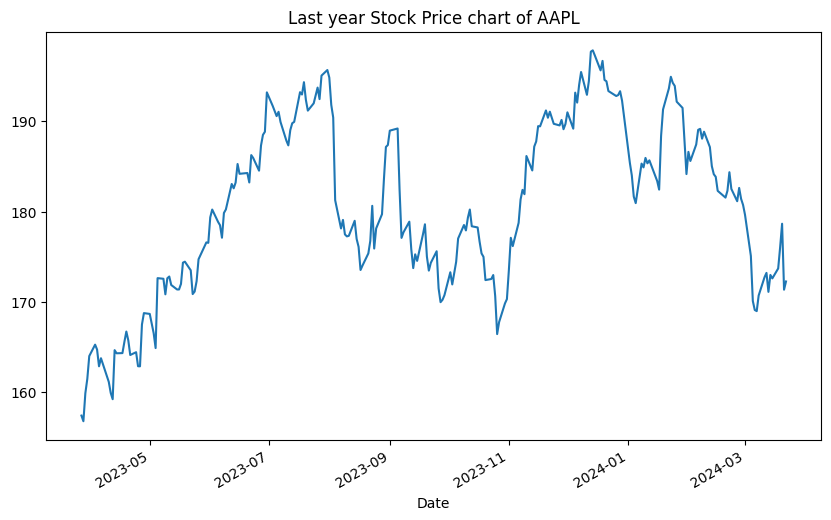

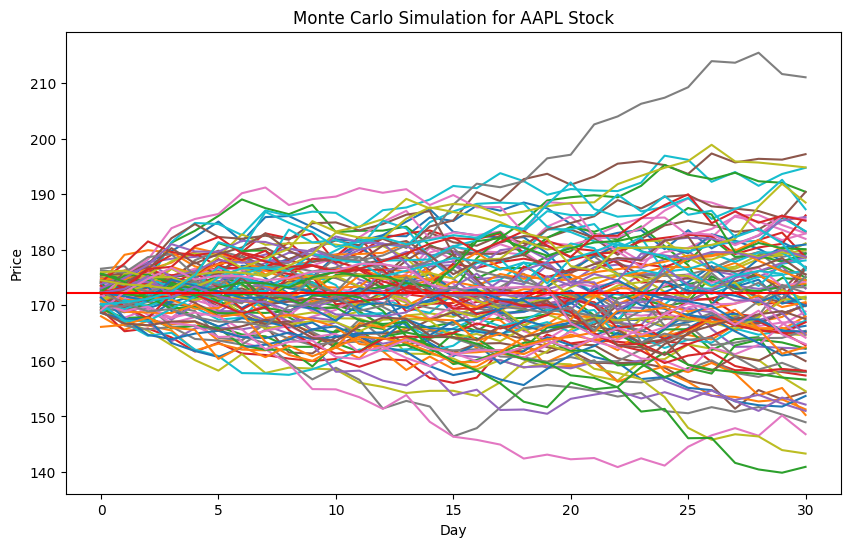

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

# Downloading the last year's stock data for Amazon
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

# Fetching data
data = yf.download(ticker, start=start_date, end=end_date)

data['Adj Close'].plot(figsize = (10,6), title = f"Last year Stock Price chart of {ticker}")

# Calculating daily returns
data['Returns'] = data['Adj Close'].pct_change()

# Setting the number of simulations and the number of days to project
n_simulations = 100
n_days = 30

last_price = data['Adj Close'][-1]

simulation_df = pd.DataFrame()

for x in range(n_simulations):
    count = 0
    daily_volatility = data['Returns'].std()
    
    price_series = []
    
    # Generating the price list for the next year
    price = last_price * (1 + np.random.normal(0, daily_volatility))
    price_series.append(price)
    
    for y in range(n_days):
        if count == n_days+1:
            break
        price = price_series[count] * (1 + np.random.normal(0, daily_volatility))
        price_series.append(price)
        count += 1
    
    simulation_df[x] = price_series

# Plotting the simulation
plt.figure(figsize=(10,6))
plt.plot(simulation_df)
plt.axhline(y=last_price, color='r', linestyle='-')
plt.title(f'Monte Carlo Simulation for {ticker} Stock')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()
